In [35]:
import random
import math as m
import numpy as np
from numpy.linalg import norm
import scipy
import sympy
import scipy.integrate as spint
from sympy import diff, symbols
import matplotlib.pyplot as plt
from scipy import special
import statistics
import csv

def A(b,l,a):
    return b*(1+2*l*(1+a))

def B(t,a):
    return 1-2*t*(1+a)

def E(l , t , a ,b):
    integral = -1/(np.pi) * np.abs(A(b,l,a)+B(t,a)) * special.ellipe((4*A(b,l,a)*B(t,a))/(A(b,l,a)+B(t,a))**2)
    term = (1+a)*(b*l**2 - t**2)
    return integral + term

def delE_l(l , t , a ,b, steps=0.00001):
    return (E(l+steps , t , a ,b)-E(l , t , a ,b))/steps

def delE_t(l , t , a ,b, steps=0.00001):
    return (E(l , t+steps , a ,b)-E(l , t , a ,b))/steps

def gradE(l, t, a, b):
        return np.array([delE_l(l, t, a, b), delE_t(l, t, a, b)])
    
def descent(l,t,a,b,learn_rate = 0.1,mxloop=1000, tolerance=5):
    n = 0
    while n < mxloop:
#         print([l,t], E(l, t, a,b), gradE(l, t, a,b))
        if round(gradE(l, t, a,b)[0],tolerance) != 0 and round(gradE(l, t, a,b)[1], tolerance) != 0:
            l -= learn_rate * gradE(l, t, a,b)[0]
            t += learn_rate * gradE(l, t, a,b)[1]
            n+=1   
        else:
            return [l,t]
    return [l,t] ## assuming it reaches golbal/local minimum after that many steps
#     return 0

### finding values of l and t
def E_root(a,b): 
    l = random.uniform(0, 1)
    t = random.uniform(0, 1)
    l_list = []
    t_list = []
#     for i in range(10): ## kind of need to trust it can find the values, coz only 80-100 percent accurate
#         l_list.append(descent(l,t,a,b)[0])
#         t_list.append(descent(l,t,a,b)[1])
#     return [statistics.mean(l_list),statistics.mean(t_list)] 
    return descent(l,t,a,b)

def dispersion(l,t,a,b,k):
    return (np.sqrt((1 - 2*(1 + a) *t)**2 + (b * (1 + 2 *(1 + a) * l))**2 + 2 *(1 - 2 *(1 + a)* t)* (b *(1 + 2 *(1 + a)*l)) * np.cos(k)))
    
def gap(l,t,a,b,k=np.pi):
    return 2*dispersion(l,t,a,b,k)


def PhaseDiagramData(datapoints):
    amin = -0.99; 
    amax = -0.01; 
    bmin = 0.01; 
    bmax = 1.0; 
    alist = np.linspace(amin,amax,datapoints)
    blist = np.linspace(bmin,bmax,datapoints)
    a_plot = []
    b_plot = []
#     delta_plot = []
    with open("gapdata_{}_corr.csv".format(datapoints), "w") as f:
        writegap = csv. writer(f)
        for a in alist:
            for b in blist:
                l0, t0 = E_root(a,b)
                delta = gap(l0,t0,a,b)
#                 print(delta)
                writegap.writerow([delta])

## better to do both separate to make adjusting the plot easier

def getMinimum(data): # data is square array
    indexlist = []
    for row in data:
#         print(row)
        minval = min(row)
#         print(minval)
        mindex = int(np.where(row == minval)[0])
        indexlist.append(mindex)
#     print(indexlist)
#     for i in indexlist:
#         min_index.append(indexlist[i])
#     print(min_index)
    return indexlist

def midPoint(data, datapoints):
    bmin = 0.01; 
    bmax = 1.0; 
    blist = np.linspace(bmin,bmax,datapoints)
    minlist = getMinimum(data)
    midptlist = []
    idx = 0

    for mindex in minlist:
        if len(blist) == minlist[idx]+1:
            beta_r = 1
            beta_l = blist[minlist[idx]-1]
            
        elif minlist[idx] == 0:
            beta_l = 0
            beta_r = blist[minlist[idx]+1]
            
        else:
            beta_l = blist[minlist[idx]-1]
            beta_r = blist[minlist[idx]+1]
            
        beta_mid = (beta_l + beta_r)/2
        midptlist.append(beta_mid)
        idx+=1
#         print(beta_r, beta_l)
#     print(len(midptlist))
    return midptlist

def PlotPhaseDiagram(filename, datapoints, mode = "scatter"):
    with open(filename) as f:
        deltalist = []
        for pt in f:
            if pt == '\n':
                continue
            else:
                deltalist.append(float(pt))
    deltamatrix = np.array(deltalist).reshape(datapoints, datapoints)
    
    amin = -0.99; 
    amax = -0.01; 
    a_data = np.linspace(amin,amax,datapoints)
    b_data = midPoint(deltamatrix, datapoints)
    if mode =="scatter":
        plt.scatter(b_data, a_data, marker = "x")
    elif mode =="plot":
        plt.plot(b_data, a_data,marker=".", markersize=10)
    plt.xlim(0, 1);
    plt.ylim(-1, 0);
    plt.xlabel("Beta"); plt.ylabel("Alpha")
    plt.show()
    


In [15]:
import time
start = time.time()
for i in range(20):
    print(E_root(-0.41,0.61))
print("")
print("Runtime: --- {} seconds ---".format(time.time() - start)) ## 21 hours


[0.40226294060356926, 0.22703154847114793]
[0.40219290878937497, 0.2270482942965476]
[0.40226316783335514, 0.22703149414445467]
[0.40226436233858986, 0.22703120859518788]
[0.40219294858373666, 0.2270482814767496]
[0.4021936612393793, 0.22704811107027545]
[0.4022645846690516, 0.22703115545689934]
[0.4022643376925249, 0.2270312144969293]
[0.4022644080318253, 0.22703119690173645]
[0.4022624279831363, 0.22703167100926702]
[0.40219148412580497, 0.22704863160807243]
[0.4041493208502793, 0.22672994838428706]
[0.4021933783009699, 0.2270481787218992]
[0.40226365349971516, 0.22703137805901774]
[0.4022641897540241, 0.2270312498684729]
[0.4021929821159791, 0.22704827344243783]
[0.40219355532638035, 0.22704813639228183]
[0.40226322376586554, 0.22703148077115531]
[0.40226229321355855, 0.22703170294295105]
[0.4022629083939463, 0.2270315561704146]

Runtime: --- 0.30498647689819336 seconds ---


In [16]:
import time
start = time.time()
for i in range(100):
    print(E_root(-0.1,0.8))
print("")
print("Runtime: --- {} seconds ---".format(time.time() - start))

[0.46477585548325084, 0.13393194929564178]
[0.4647763147543307, 0.13393189673600647]
[0.46520365466427116, 0.13388672508298471]
[0.4647391959876519, 0.1339397071309948]
[0.4650386207640673, 0.13390485869948843]
[0.4647773360736275, 0.13393164057965157]
[0.46474117352977073, 0.1339393527513384]
[0.464775950154369, 0.13393192830897738]
[0.4647765808516562, 0.13393180917739111]
[0.4647417011412598, 0.1339392855905479]
[0.4647418995460667, 0.1339392472688934]
[0.46477534097669115, 0.1339320600082743]
[0.4647398509837901, 0.1339397193789288]
[0.4647402723538854, 0.13393957579908444]
[0.46477728359378445, 0.13393164354668785]
[0.46477495803698077, 0.1339321417754873]
[0.464777147526633, 0.1339316853610807]
[0.4647399984846883, 0.1339396196666418]
[0.46477673676641584, 0.13393177136922163]
[0.4647758555106032, 0.1339319474032351]
[0.46473990381483354, 0.13393967137089036]
[0.46474154179322746, 0.1339392727533042]
[0.46477525969981626, 0.13393207391167772]
[0.46477664539595087, 0.1339317619273

In [17]:
import time
start = time.time()
for i in range(100):
    print(E_root(-0.7,0.69))
print("")
print("Runtime: --- {} seconds ---".format(time.time() - start))

[0.3295089772631583, 0.30706034487222167]
[0.3295090654434706, 0.3070603127878382]
[0.32950904318538754, 0.30706032090480884]
[0.32950937767161403, 0.3070601995448873]
[0.32950958009446785, 0.3070601260123319]
[0.32942583830299765, 0.3070905260635405]
[0.3295093600814405, 0.30706020574007575]
[0.32950993934582384, 0.3070599956670975]
[0.3294262442211937, 0.3070903781399932]
[0.329509621865279, 0.3070601108787675]
[0.3295086126534743, 0.30706047792296354]
[0.3295092276315421, 0.3070602540134749]
[0.32942577996916433, 0.3070905475139547]
[0.329426593969919, 0.3070902511086735]
[0.3300151865143106, 0.30695063155414437]
[0.32950935973526463, 0.307060206023808]
[0.32950894007454556, 0.30706035836130297]
[0.329509526881004, 0.3070601453170876]
[0.32950971188339806, 0.30706007831851345]
[0.3295092235185315, 0.3070602557714486]
[0.3295096173715011, 0.30706011256701327]
[0.32942598458143524, 0.3070904729872517]
[0.3295091679569152, 0.30706027588762885]
[0.3294256442304052, 0.3070905966534432]
[

1.962193259037174
1.9394857693502519
1.9193396109308754
1.9013787645420284
1.8797299863990637
1.8588462647751265
1.838940052326703
1.8151151650874646
1.7994317376420932
1.7794203609060573
1.757409275099752
1.7369026354800414
1.717454062889548
1.697941682460476
1.67987735838344
1.6580458024044422
1.6390327159606572
1.6172846698693217
1.5974796471365793
1.5778900059825145
1.5557449169177537
1.5401460687333193
1.5143861541777528
1.4942416037846693
1.481283201947624
1.461273503630797
1.4386011762071287
1.414961326864702
1.3961554319256333
1.3781070012715473
1.3576341512203276
1.3358141541939648
1.3175887019238686
1.2962735613737237
1.2769538367934674
1.2573033708671923
1.236375285233234
1.2141158329753519
1.195740411139306
1.1792098570632532
1.1568652694419033
1.1350290391736166
1.1160325811453817
1.0992073448968258
1.0714990899133339
1.053091562910079
1.0349475627563458
1.0168613413384526
0.99619109781914
0.9748006035911361
0.9572525625899785
0.9389639616731525
0.916686798652402
0.8969522

1.2167512181643418
1.1920274080674425
1.1772135460801525
1.1572461162979095
1.132934827105514
1.1169971740848335
1.0968372392185173
1.0739379299125853
1.0542922420532392
1.0352790846522457
1.0100269558091814
0.9958331352803084
0.9748758586157112
0.9546959532153284
0.9344991133182118
0.9145378597760129
0.8907538285696605
0.8742235466754266
0.8537640777614156
0.8338730011871547
0.8129642251877329
0.7929226121460783
0.7729248831371123
0.7524040553947525
0.7320406514366995
0.7121594245860501
0.6915354774470035
0.6715013253900456
0.6511046744710326
0.6285687207860245
0.610326939640327
0.5877783923527464
0.5695102501802867
0.5491903788185674
0.5288677901487004
0.5086693585880264
0.48824805437320085
0.4676171123186052
0.44743119326421593
0.42545758142738915
0.40673032522247027
0.386165880516317
0.36596102963752625
0.3452498834028953
0.32509451566467534
0.3035569298387155
0.2842514146146932
0.2638408924632766
0.2434032411085397
0.22229899905220737
0.2024387213788813
0.18202515428031307
0.16152

0.5436202436643693
0.5230250541540168
0.5025996743333927
0.4818415495351996
0.4600350804205915
0.43592278674924106
0.4147871315298141
0.3974758685788635
0.37869250849455455
0.3580837675839
0.3345974544609501
0.3169337762345653
0.294485964758574
0.2752696851451506
0.25453458156627856
0.23129345472109292
0.2130200914185789
0.19235945951041522
0.14772485101906735
0.1505677919734774
0.11196205897119245
0.1092548605134065
0.08812524994260808
0.06830328067037715
0.04680682276425522
0.027457144524156697
0.005237637377783642
0.015519525227804412
0.03635853838841286
0.0546383634363365
0.0782981967876947
0.09892725716684146
0.12043478584928069
0.1415215158542861
0.16262883403006279
0.18400022337141544
0.2046308626053739
0.22622420399213738
1.7787623589891817
1.755961558027198
1.7374526000400814
1.7178276846917766
1.6982304312478484
1.6716566469435583
1.6585533673596349
1.6358833168083509
1.6185507317415093
1.5893018237711345
1.576535084728603
1.5539798660567032
1.540792150208449
1.50182528223080

0.21693330671722172
0.2386050233517144
0.26025398133934946
0.28194556315433206
0.3036202017726076
0.3254168329577193
1.7024805824642961
1.678759583528927
1.6601581829880927
1.6383718905691713
1.6111786939070643
1.5950964768971259
1.561382151517958
1.5548389172027426
1.5307040532152465
1.5167337550469497
1.4987013276461347
1.4589915785235428
1.4560741418325536
1.4366759226718393
1.417115175138965
1.3893457559662625
1.377647183571854
1.3567540924902557
1.3364847755141884
1.3034569225842692
1.2977680033589651
1.2802522879668123
1.2575411001673127
1.2373667521037623
1.1953458116849582
1.1728103202325917
1.1712855728034959
1.1542596779546788
1.1190648877827658
1.115768471425012
1.0885642753572933
1.075066289254888
1.0548588533527374
1.030394919693677
1.0138335099556501
0.976273017239794
0.9666688209893306
0.9532463914086226
0.9317909674111964
0.8916172435995893
0.8835635469813817
0.8706397213112469
0.8498661909863222
0.8292931506314631
0.8090599327693748
0.7855329236382259
0.767541822974594

1.1779029139020425
1.157618604550927
1.1379806741113883
1.0932264674434098
1.0791449842540013
1.0622948597110788
1.0063897659383325
1.0353984798944256
1.0148579018934911
0.9944042688998843
0.9319856170718822
0.9266464651829222
0.9323092951180539
0.9122279750904188
0.8916465644757018
0.8526798263753728
0.8508673398719443
0.8109726099794538
0.8095830962806908
0.7884476634566732
0.7430948736455516
0.747041441061578
0.7113286537423126
0.6906242718951446
0.678725165514683
0.6483664284410099
0.6253793490810238
0.6224034155761623
0.5948419865644762
0.5807170991502033
0.5546066509784144
0.5230698732828837
0.5180608838517218
0.49731198411122884
0.4763687685594222
0.4578037477950191
0.4259930665476117
0.4134318284772203
0.3923020780704712
0.3712851276566463
0.3497986080472552
0.32920769023732416
0.3081426569895107
0.2838435817647441
0.26597752154175797
0.24420465503381752
0.23794862172280168
0.20263206675917325
0.181182234186931
0.15425000636098765
0.1392048373677788
0.11805481221358353
0.098105

0.47712093114164605
0.4561187731022234
0.4350974971561991
0.4140594879269686
0.39334228518262737
0.3720371687129864
0.35085037072751757
0.33047797840957327
0.3086341216542828
0.28750564607833445
0.2663650015157361
0.24521213690235794
0.2240504506399842
0.20294683948889616
0.18170489508821866
0.16052485754575513
0.13938455556826054
0.11709784580661628
0.09702114313878664
0.07589109141063205
0.054846909991060865
0.033802578658904577
0.01300196882688935
0.007322982617285125
0.06536564176148306
0.049577369320573314
0.07116131038562025
0.09295832491390715
0.11487576197060233
0.1369125720299362
0.15917486067155961
0.18154739330134492
0.20404718541277894
0.2260167195417405
0.25359773143347414
0.2710390518800535
0.2979571749195297
0.31686636164965293
0.3336730018064729
0.3618091229178855
0.38476042623839724
0.4075285173164403
0.43041213340851103
0.45489406556140394
0.48080732909472756
0.48852974275333005
0.5224363458211537
0.5458803993838004
1.5186275290140199
1.4904619231183391
1.472820681954

0.2679561900118217
0.29084287450741897
0.3138854429271171
0.3369375154023562
0.3600737540913694
0.383276174115334
0.4065783901344292
0.42990325031549226
0.4544745757964121
0.6097444691031892
0.5040715782541282
0.5236748864142299
0.5472387299921895
0.5758314786779296
0.5969984451217677
0.6198879337677649
0.6419034298373197
1.4366889242192122
1.410637153572181
1.3871062355277035
1.366226309113381
1.3613245594611358
1.328319370597961
1.3172553113242735
1.2885347047152071
1.2713253432650815
1.2279546848847989
1.2409107959571288
1.196616208444629
1.1704078593933238
1.1812760120872592
1.1612088542882506
1.1410690607622656
1.1205887442104316
1.0388326440758553
1.0803337208809474
1.0600078767445429
1.0205406627046292
1.0192473587974886
0.999478267561186
0.9783696120810936
0.90413500772977
0.9373829945000899
0.9175018978195578
0.8970128276861512
0.8757148611656576
0.8551098908072894
0.8344873374404185
0.8037332162847217
0.7992943813331551
0.7722359121692772
0.7517681334411517
0.731037799599208


1.0822432714401744
1.060173039456546
1.0418067789089323
0.999988493737843
0.9555965428692288
0.9606548725304843
0.960450269152602
0.9104090204045575
0.9115034251243195
0.8991096419114044
0.8786115510030684
0.8580913207096581
0.8375494484588317
0.8169812687480392
0.792012949698441
0.7757832509210046
0.7140313748016577
0.7345045529104219
0.7138349631834853
0.6931436423164536
0.672437698902901
0.6517106585970505
0.6309626554894983
0.6101993032057612
0.5894184915704233
0.56862181965953
0.5478042923447077
0.5269734414385818
0.5061254172463857
0.4863490705147993
0.4643812235578011
0.4434867221249891
0.4225793633534093
0.40165793992923915
0.3807237317049625
0.3598930238734064
0.29392450101206335
0.31785796165090047
0.2968847800024089
0.2759944321635078
0.26760362693649653
0.23529359001838776
0.21295926750397634
0.19198327724704925
0.17108363282329234
0.1501335171386278
0.12920942519019527
0.10827255896295561
0.08744640095356378
0.06670149026694974
0.04608205370623597
0.025674053555222343
0.00

0.30408582127386025
0.2833823288720727
0.2146750860545882
0.24182214955949524
0.2209696114121474
0.20020824844638735
0.179463956671572
0.15874382536804266
0.13805607047367013
0.11746787380531129
0.09683364388194904
0.07634056916633901
0.05597468690595924
0.03580674187301713
0.015994805106310253
0.002634395749506894
0.022183305901631013
0.04282672925697642
0.06397780975738969
0.0856308604042034
0.10833761217256423
0.1322941297967057
0.15230780335515373
0.17501041998291558
0.19786344944629083
0.22093617703295038
0.24421361917635778
0.2675496939951907
0.29111031000207016
0.3147076646884024
0.33851156959240164
0.3623807391666222
0.386351614406818
0.410420644227592
0.4556128005093113
0.46438430709779416
0.4831497828625653
0.5166524801038949
0.5320281632038172
0.5586309427004712
0.5817993339559375
0.6058407311848777
0.6305717077003328
0.6553548742364772
0.6802429884288201
0.7073033023227904
0.7300774990710507
0.7552250900790204
0.7802221001458134
0.8052090777748635
0.8303678104979025
0.85715

0.5419771934077625
0.5669114109779547
0.5919970638586312
0.6171186874195115
0.6422735022880443
0.6675744555778065
0.6928994754578868
0.7182518335233372
0.7437341780525877
0.7709954738312133
0.7947935606791776
0.8203745423635233
0.8460396092440343
0.8718257505658762
0.8975275918338738
0.9539682834492162
0.9491555464084944
1.186219466055135
1.14600933696183
1.1313358409141816
1.1174130417016914
1.1007298007704793
1.0746312124823945
1.063838541753782
1.0445348207253513
1.0119970018089068
1.0052087224844173
0.9801640436255232
0.9676348402033804
0.9453173676591452
0.925225089522143
0.9050933633921125
0.8849317234047749
0.8338223865033767
0.8445219019803696
0.8242893876568241
0.8040319627063105
0.7837615103555902
0.7634763030606992
0.7431765979185555
0.7231991636142581
0.7025407060249834
0.6822062792997702
0.6618599510778237
0.6418339495736445
0.6050002354686397
0.5821012505260049
0.5803914551381999
0.5600054746803721
0.539610794951
0.519208837388728
0.49880180531413376
0.47838642516900437
0

0.846911247907321
0.8268712819453367
0.8068220708970861
0.7867501966977062
0.7666748700621466
0.7465843269708804
0.7264926059280102
0.7063946738614862
0.6862942969592605
0.6661921724129416
0.646088946710838
0.6259843569905766
0.6058823805323058
0.5857776802849368
0.5659346154333893
0.5455707916226643
0.5254692217968615
0.5053698946529411
0.48546055398192844
0.4651754624510111
0.4450816112949704
0.42514123432931455
0.4049003099390568
0.38481493469091144
0.3647332058210264
0.3446581393463324
0.3245898084862516
0.3045284041444629
0.2845726460411965
0.26444088143048317
0.24441876476892904
0.22441664722656396
0.2045127142871391
0.18456167512087354
0.16458519956029785
0.14472549730238202
0.12498772571361823
0.1052156363915586
0.08565932523018072
0.06619648449784335
0.046901460916589435
0.028018444199662505
0.009711262950718894
0.0071265205520132545
0.025854986679165647
0.04576242473055945
0.06642642616631313
0.08766876435686836
0.1093397604625358
0.13145724447963797
0.15397540281264968
0.176

0.17833214246262563
0.15893375824069186
0.13953109956018073
0.12026661999494608
0.10115049600506561
0.08204994453694547
0.06321669904980064
0.04453003395540614
0.026260765301797506
0.008726772391837478
0.007286693211455916
0.025424059891442294
0.04486277726278544
0.06515413738274983
0.08605926046669081
0.10759714988324802
0.12950535235339553
0.15191537319343093
0.17463741601255867
0.1976317184688192
0.22102293483407534
0.24457771351815022
0.26848386725564793
0.29251362099674727
0.31685982554664494
0.34134926605458304
0.36602212946832
0.3908129682870843
0.4158717721473438
0.4410311859930578
0.46676939343004753
0.4917682202623495
0.5173333023509237
0.5430185681788606
0.5688189892615327
0.5946800791319711
0.6207449405666237
0.6555136504184311
0.6730258946942889
0.6993633046216777
0.7257522194752336
0.7522170300866802
0.780488912422086
0.8053887926574972
0.8320401232808156
0.8588130131079248
0.8856426706771758
0.9125389764754424
0.9395818033900264
0.9756088731295371
0.9936030250789188
1.02

0.5138026566999152
0.5397955378583942
0.5659757487895576
0.5932407417319041
0.6185431836377052
0.6450796172567109
0.6716202440563193
0.6983347701166376
0.7251634724593605
0.752052756354049
0.7790338086811391
0.8065593607454309
0.8333651692217239
0.8604784625762117
0.8877848071887668
0.9151655889025188
0.9425866520816023
0.9705879401347305
0.9976754604873233
1.026214153875124
1.053047486535825
1.0955570587940502
1.1089534000962713
1.1365017674013633
1.164432624347114
1.192418790587957
1.2204732380437764
1.2485513840830897
0.9167446296056901
0.8943782800771655
0.8819007523463496
0.8654866069934567
0.8239446734235594
0.8285591249122263
0.8093423298048613
0.7899397934313688
0.7704499714659391
0.69563789758842
0.7167500215911718
0.7165046730177221
0.6923125086019922
0.6728155358506167
0.6178794398556727
0.6339249909557617
0.6145355634781828
0.5956069425680458
0.5758637342863023
0.5565869907737172
0.5373467207238933
0.5181432871062174
0.4989720715034648
0.4798371072856753
0.4607321434272919


0.7455721412385798
0.7642197099517601
0.7210699164394364
0.7313074915229888
0.7120714289555663
0.692811833256664
0.6735683610500518
0.6543589446443883
0.6352063684566753
0.6161157626915647
0.5970899690926654
0.5781287579710648
0.5592391917093058
0.5407953633915864
0.5216618543394039
0.5029719364581224
0.48434015548624376
0.4657673025548475
0.4472492901577587
0.42878195671305963
0.4103604524077984
0.391980797962377
0.373641936072041
0.3553379704382641
0.3370678338358863
0.3188288591304719
0.30061711331197116
0.28253778545909114
0.2642751431757315
0.24614319233719242
0.22812589480151796
0.20996563490284664
0.19192321649572783
0.1739916169664793
0.1560306420143896
0.13806377635400632
0.12023447578230616
0.10249553106685852
0.08487625859201531
0.06746621603200567
0.050177746731265474
0.03326682518577346
0.016893898207800847
0.0017452145191008278
0.012890261366495404
0.030140689846464754
0.048790632301531835
0.06836571936667636
0.08872409755591393
0.10974802079800305
0.13129669521222756
0.1

0.17139470445419605
0.1542197955988241
0.13709262387985816
0.12002670059513543
0.10303895193222366
0.08615736577413484
0.06941940022728338
0.05288121678097075
0.03663390139541818
0.020850937083609234
0.0059624189886774304
0.0072864019662886035
0.02321764290436593
0.04085603958276948
0.05959479850511318
0.07919652988373735
0.09967136113073073
0.12076440472418641
0.14244959164249466
0.16460698044436461
0.1873600958307793
0.21043226180593025
0.23402585610050564
0.2579276470336839
0.2821727594447384
0.30673454619210994
0.3315301367372318
0.3566620918080675
0.38212010841313737
0.40775361692865936
0.4345182139164016
0.4596328838882029
0.4859797771999726
0.5124531079422402
0.5391089710021568
0.5659369567769401
0.5929279287649349
0.6200750317838122
0.6473096258257565
0.6748058417236927
0.7023770286461491
0.7300152053837196
0.7578962086252243
0.7857758592935431
0.8143054398306029
0.8419834911252682
0.8709809938622792
0.8986582896291894
0.9270566921192568
0.955656114442769
0.9869268459844956
1.0

0.7170282144135763
0.7451751701581579
0.7734576427395939
0.8018028705357763
0.8303322121349241
0.8589788730808259
0.8877361719881696
0.9166625837190685
0.9456282337528171
0.9746936994391677
1.0038066691751444
1.0331025949225165
1.0624413405481767
1.0918955908799148
1.1213178761003397
1.150951688468508
1.1806296995879209
1.2103422411052756
1.2400976086824573
1.2712666501699534
1.2999035775449812
1.3299429856030007
1.3771827511413233
1.3909329054893989
1.4202748369119604
1.4505337613975604
1.480823591379455
1.5111505722253458
1.5417495035141748
0.672001907118194
0.6466241507035867
0.6300463324016807
0.6007194030561511
0.5941950010705602
0.5724772699410462
0.557471405100887
0.5392865707215585
0.5212828226631169
0.5034745856550448
0.48586291374928814
0.4684465796228655
0.4512137536618843
0.43415228585210713
0.41724734032145744
0.40048067412656035
0.3838378207104664
0.3673023120722102
0.3508597043022317
0.3346483698434505
0.31833391261329713
0.30207446297363566
0.2858576306491454
0.26956364

0.5524638447985197
0.5382269188950348
0.5170723271426645
0.499325393210584
0.4828141331557255
0.4587240433364715
0.44771163288515103
0.4311049677218854
0.41477239726271226
0.3986948818232488
0.382839476107437
0.36717642965560054
0.35188158316887896
0.3363146593133702
0.32106232318384614
0.306041126260308
0.2907913019953534
0.2757349053704777
0.2607069040275919
0.2456960304398893
0.23069005450243063
0.21568203930932556
0.20066540410996167
0.18563743976589162
0.17059689430057132
0.15554651094521135
0.14049127636019668
0.12543859015631703
0.11046736849356992
0.09540313164187585
0.07217632055253986
0.06562405842901656
0.050934721384329674
0.036482624396848136
0.02241260046659348
0.009041438679243804
0.0023908670433433147
0.01580380579332331
0.03135063023794169
0.04832966616811601
0.0664523804792387
0.08554716729942936
0.1054888703371966
0.12612426796473225
0.1475603369271732
0.16955226854698657
0.1920424397058421
0.2151142806678146
0.23866542835114626
0.2627244951864178
0.2870615856076941


0.0561593884306613
0.04245049035483805
0.0290021160196789
0.0160037693356665
0.003940381897438685
0.006677652568616224
0.02033746246254969
0.03570748617257302
0.05249254738496172
0.07041550494901438
0.08938364961219585
0.10916495667851311
0.12972930534352106
0.15100466062979417
0.1728620411782204
0.19545014442620823
0.21844960623099166
0.24202617763626927
0.26614612472279
0.29063742816031013
0.31546562910850123
0.3407514893634725
0.3663973360248091
0.3924581190163566
0.4186856824024394
0.44536395842664095
0.4722535629187202
0.4994074765067926
0.5268171367258837
0.5544646080777221
0.5823426828270789
0.6103608409708812
0.6387347864324767
0.6671527480386438
0.6959099969390137
0.7247660564918732
0.7537965590348593
0.7829117737339129
0.8123311005168495
0.8417515146490138
0.8713896847175404
0.9011586213876898
0.9311289510940784
0.961082483573024
0.9912969131359611
1.021557927734181
1.051927132016943
1.082339294141273
1.1129208817237737
1.143597326163032
1.1744331594673427
1.2052377634382458


1.0618547913131489
1.0929086568240423
1.1240050384566218
1.166635117196492
1.1865129693628558
1.2179113239166917
1.2494120497347636
1.280997286515387
1.313102079385169
1.3443794400499023
1.3762224850937488
1.40820600865292
1.4402083568151287
1.4722797310548958
1.504425471689153
1.5370663029530556
1.5904811881097294
1.6013184548123953
1.6336830937509637
1.6666200801515358
1.698732238949229
1.7312788885641759
1.7649152530068257
1.797322502891434
1.8293843710867108
0.4075188592835233
0.3950061950542418
0.3792022076321546
0.363494685636665
0.348502204605249
0.3343024999088114
0.317890159089698
0.3079423107914554
0.29552565080124527
0.28345339981614714
0.27161839612063243
0.2599334475455674
0.24845947577018357
0.2367413954311118
0.22513268448316678
0.2134668201984673
0.20172014467052185
0.18987569482764022
0.17792178820938495
0.16585170654343753
0.15374302985296628
0.1413600976772582
0.12894781687717125
0.11643612222573274
0.10383794846215413
0.09117375397188472
0.0784670750983921
0.0657532

0.2786868617230343
0.267601759464403
0.2572491540401432
0.2473792920616121
0.23778887482440766
0.22832581492705237
0.21887798044533088
0.20936679949244655
0.19973476427412878
0.18994628605939637
0.17997755758294984
0.1698133655539403
0.1594480457209229
0.14888027434168236
0.13811608111218726
0.12716110491193222
0.11603032803281846
0.10473619630704752
0.09330070569319239
0.08181516872249182
0.07010523148611542
0.05848146168699094
0.04673090802762537
0.035121654314035
0.02376521205529044
0.012675069948430049
0.0026237944082629482
0.006544307376990594
0.018519333756561392
0.032397822286810256
0.04780049430132329
0.06438794140344496
0.0820140592453026
0.10077670173668306
0.12037515556854977
0.1407316354433276
0.16199959643457695
0.18390258331264703
0.20646018144647363
0.22962806226243748
0.2532868001670934
0.2776355192503551
0.3023997833906435
0.5959262706808351
0.35330337090261105
0.3793020997994049
0.4058551848639774
0.43269010244534517
0.4598715243716819
0.4872926794133455
0.51519437097

0.019040343799241688
0.03232062008417367
0.04720447807567276
0.06321933133882843
0.08052272626763467
0.09878889804015606
0.11792818239673314
0.1380203986974619
0.15900164447096296
0.18057160014625662
0.20300491564937634
0.22600995247162528
0.24953522089073846
0.27371754358876305
0.2984318458808147
0.3236452504738885
0.34933233049817775
0.37546324779466306
0.4020996624674781
0.42895495703379405
0.45635621061611104
0.4840255513184854
0.5120234431207382
0.5403390189508127
0.568957029726424
0.6108934211039179
0.6269371622083325
0.6563672589483651
0.6861295852485636
0.7159441248767264
0.7460732844859247
0.7765038079133795
0.8069617495095289
0.8376949088430276
0.8687056686412357
0.8998078709007906
0.9309885429144442
0.9625098588940608
0.9940952343596628
1.02583547264151
1.0577142014128862
1.0896491694272843
1.121885512375065
1.1540862790498505
1.186566046815023
1.2190094706199965
1.3001892590558117
1.284464588807452
1.3172637253803996
1.3502606684981402
1.3833092472549111
1.4167120115011185


0.8980084959991346
0.9295899291678693
0.9614381536560601
0.9935482224754807
1.0257238289076396
1.0580576289122134
1.090452617796919
1.1230726440249914
1.1559190331218003
1.1887304056127734
1.2218307391249987
1.2548926355201626
1.2882290659701292
1.3215239192929018
1.3550855490404818
1.3886750664834135
1.4223617073699784
1.4561512132447438
1.489955093829501
1.5240035422038165
1.5580640284562655
1.5922162090306204
1.6263831525027892
1.6606915025887494
1.6951449383006911
1.7296063180023273
1.7641437428175206
1.799354204340504
1.8333776687104846
1.8681347808559645
1.9029246839046687
1.937859733032912
1.972748741774318
2.00771775163811
2.0427746600203838
2.077927970762377
2.113112381125997
0.1608957259965028
0.15640075265146317
0.15388021509147803
0.15251787219146323
0.15111070608317206
0.149185535021679
0.14662439684151268
0.1432523032484479
0.1392206103599983
0.13451935429053216
0.12919044433671736
0.12327901951254049
0.1050053791437289
0.10988158185970737
0.10255368507362528
0.0946577867

0.09454011622787353
0.10127941799693244
0.10683990843365249
0.1108472181263878
0.11308563414272968
0.11379489129338893
0.11319215487038758
0.11145490561643043
0.1087259235870971
0.10518103674644147
0.10074214635327004
0.09566681950786794
0.08996930007134193
0.08379444119899318
0.07704193237476947
0.06975668370166399
0.06225436999761397
0.05423512750458492
0.04602760988773349
0.037605528938264486
0.029158233233987963
0.02045922907124039
0.011996882963029218
0.0032299982715096836
0.003374685209442834
0.011445740085690518
0.022404980607599222
0.035056547717439525
0.04901896540082525
0.0641773873425557
0.08061394055524725
0.0982395851912937
0.1167939403159821
0.13630335091148132
0.15660692055618158
0.17793010667512252
0.19994183690881084
0.22259021140084803
0.24611764826671145
0.270196403810213
0.29488040724589437
0.3201382538956641
0.34593548930564894
0.37214211258608104
0.3990256374086745
0.42626660092487667
0.4539374819449478
0.48201558030739605
0.5103734693250684
0.5393027047201481
0.5

0.09180134441932553
0.1098212528389646
0.1286449397334843
0.14861514861747407
0.16936875255612016
0.19095520327964918
0.21322133258604695
0.23642935084111857
0.2602289486709227
0.2846842696459953
0.30964794541480084
0.3354025223863694
0.3616009999700163
0.3882087467743342
0.41541741461856735
0.4430886825131101
0.4711949433890132
0.49982861475756224
0.5287501902055941
0.5580416484166293
0.5876915757214639
0.6175722212996086
0.6479904794418304
0.6786055698829654
0.7243050510632407
0.7406994978868344
0.7721538391937203
0.8037504231124204
0.8358041544578257
0.8678762194905415
0.9002754235647855
0.9329880493556233
0.9657979717943854
0.9987027347173809
1.03189742386372
1.065364578847263
1.09890891817816
1.1326175734072352
1.1664799631291671
1.200496564130482
1.2346574394148764
1.268964766200652
1.303400380287581
1.3379671693993982
1.3725760619264524
1.407476325902937
1.442409831987749
1.4886418319878902
1.5126113109986172
1.5478699861917586
1.5832838258192596
1.6186978872660234
1.65424167649

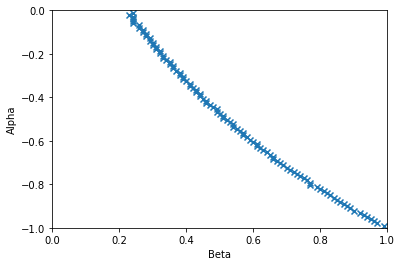

1.9405903426334787
1.9372369351900491
1.92058483120146
1.901289395170637
1.878961156955912
1.8568509805081315
1.8376110875425717
1.818496435984661
1.7973280189287906
1.7775177978447885
1.7573754882312336
1.7366879424228088
1.7180867172088758
1.6997050291467286
1.6782276158776857
1.6609639053917553
1.636289702946431
1.6162576149064873
1.5962814609158893
1.5767511011825386
1.5534723292708434
1.5341286290204674
1.5161229494793065
1.4951491399916468
1.4786680262004677
1.457688300906675
1.4353290171139237
1.4139157201163461
1.400184654748526
1.3738693418933672
1.358160122885694
1.3373410254163192
1.3186176214866827
1.292883552418017
1.2792350020047458
1.2533576398378468
1.2319158144619269
1.216973261233735
1.1948333558537643
1.1796812090789683
1.15508600090941
1.1331349493114773
1.1197817448518228
1.0951522225041357
1.0726578893880891
1.0562578473439463
1.0412566363850864
1.0112716457374955
0.998426871206514
0.9748439239070271
0.9574619904850131
0.9385026394621614
0.915659003732687
0.895411

1.2581258498105692
1.2368512090837065
1.2148139737551802
1.1959936811243332
1.1732962411783874
1.1558492168832968
1.1374061911206979
1.1169202043556232
1.0957146777284106
1.0760044806706424
1.0537966146323268
1.0358338622574905
1.0139654794914787
0.9955589907795834
0.9750150157836773
0.9537604972828223
0.9344802311150775
0.9141515861300824
0.8939631458013071
0.8737982523951138
0.8542134651632676
0.8336404748609915
0.8132597943552518
0.7931266629661841
0.7724747350607182
0.7517875216329601
0.7269490466329204
0.7118699759728052
0.691770328016108
0.6713295805155794
0.6510558071050858
0.6307051644611075
0.6103754750136025
0.5899000286462143
0.5697789853850317
0.5488447769769703
0.5200687955580647
0.508578327281677
0.48840120240939133
0.467477927385855
0.41459821287630644
0.426862192416689
0.40680900166409373
0.3863241349146541
0.36574203951745454
0.3455057485883896
0.3250511767940636
0.30464472891763317
0.27969474351846535
0.2530609965962332
0.2430635639575381
0.22286041616363098
0.2023562

0.523165351886734
0.5027514644040298
0.481836056298476
0.45719576918756233
0.43731503772450303
0.42008727379315364
0.3991897821114576
0.378688121438286
0.3789808975954221
0.33749516181844325
0.30735249750322136
0.29593825441261146
0.26682183714608937
0.25454179973974056
0.2338131067352524
0.21304346295946325
0.19047326650031263
0.1712013565020544
0.14704372200211344
0.12171484644333448
0.1069493621984176
0.08837033785167522
0.06762214278087011
0.04028989866867782
0.026005376617200305
0.0017864498832255112
0.007026138733482653
0.036363190961814444
0.0646738720278942
0.07804135409953364
0.09998188356184329
0.12090306175081289
0.14153566121569458
0.16265659668009286
0.18379947694566032
0.2747530967498161
0.22592554757588607
1.7795969404978842
1.7598121753541183
1.7389957825350815
1.7187396282389387
1.6909171614710024
1.6790799644085004
1.6548367615275497
1.6284469807154869
1.6148212981543915
1.5972033830316728
1.5799184517387888
1.5586831406063597
1.536679523111535
1.514237778735513
1.500

0.1320222379731219
0.15221659817853847
0.17375203174794368
0.19532982513343222
0.21744779406784687
0.24177680042908517
0.2602201598247006
0.28193143023162476
0.30373607572550737
0.3255384908939369
1.6988861959213468
1.6778377091239456
1.6602436955545739
1.6402306482337643
1.6137991676097287
1.5970491602176409
1.5642313400073822
1.5527133855159734
1.535042780837733
1.5133844349198533
1.483109834258826
1.475268975392717
1.4516128121930412
1.4366764979788866
1.4186670413043971
1.3848610383143658
1.3783774533957314
1.3611714328494977
1.3408012231089912
1.3079034038722854
1.2977770342468489
1.2776807068857707
1.2575599572097613
1.2203073963121105
1.2189264293467799
1.1969358860299735
1.1598573237625933
1.15255015827621
1.117296544797379
1.1157692345654613
1.0822037723205458
1.0517757709259756
1.0550049018082588
1.0286873931550482
1.0103574232802102
0.9853599430753924
0.9490463140455057
0.9524725230096822
0.9066936740724165
0.9114740043338265
0.8904814511264525
0.8661792710485224
0.835150494

1.1265198809993329
1.1512130243073329
1.1372953545431141
1.1169538225499778
1.0848201536667241
1.0476215053472953
1.0557773926107317
1.0353229083786615
1.0148585600940583
0.9965548893805779
0.9565700170967496
0.9533412124729954
0.9152434353153569
0.9126683059923273
0.8893165240893898
0.8733403038902587
0.849852066854823
0.8105190230269631
0.8091241807334366
0.7884477862568994
0.76775317599562
0.7231635220275245
0.7263153586043231
0.7042373599251777
0.6848006468189722
0.6640770829476634
0.643219315225831
0.5977080435786026
0.6015697465013607
0.5748098126089366
0.5570181406674639
0.5358271845848407
0.5095516722288049
0.47698129819500523
0.47359416108395735
0.4552547271172905
0.43429396244237073
0.3981902213069593
0.3923020266016659
0.3714099730422109
0.35013900877729165
0.32796223817116504
0.3081371404980379
0.2870673477112432
0.22225632651208269
0.25377179847925607
0.22572891656122143
0.20263193878068905
0.1814955047138312
0.1603527300672736
0.1392039432838405
0.10991266068215584
0.0969

0.4350974792239213
0.414059539389678
0.3931357053735237
0.36144387098318775
0.3508497448120828
0.32974871536259004
0.3086346250035307
0.2548612324275123
0.26592970083217193
0.2452122853173885
0.22125423346631917
0.2028893559450032
0.18175182292859085
0.16058810662295525
0.13934775363852286
0.11817680651469878
0.09969195063075577
0.07593596442615551
0.054806268838889415
0.03380290860322849
0.012971882442331576
0.007323103502472291
0.02826820278875161
0.049612319097545786
0.07119699515545501
0.09500836676388635
0.13751924377627944
0.15601641093167065
0.15924414604564607
0.1812800732045333
0.2049632312224082
0.22600088408309213
0.22966032134892903
0.2710568624805032
0.2936407753369631
0.31635783358767006
0.3390384300298384
0.3622226201545553
0.3869458620818057
0.40752389537823935
0.42891913642005275
0.4533669464483144
0.4764154301495826
0.4993739190698458
0.5224601432353136
0.546224030160346
1.5216310060673335
1.503580343107303
1.4732659953813851
1.4422541191980343
1.4182249143973225
1.40

0.2679630173611126
0.2908833366591836
0.3139746433637446
0.3369648568892582
0.36259358030244726
0.38328074691850134
0.40657957951964196
0.4299038516207571
0.4532789033171467
0.47666882640928093
0.5013246677284778
0.5239086684553443
0.5472580762599578
0.5708610275136545
0.5944923325531363
0.6186747437422038
0.6418675703935026
1.4373030967657519
1.4162233136921114
1.3844237672453867
1.3703526460234976
1.359783098274402
1.3380547848414701
1.2994976197474462
1.2988017723391865
1.2792120840606918
1.2294106059855736
1.2008577487170449
1.221156942084587
1.1604396483387418
1.1559526558157198
1.161206073066743
1.1257759830665621
1.1088442015497282
1.100619387438818
1.0803347284506837
1.0643477377670552
1.0408244508778428
1.0202367399452514
0.998824380999886
0.9708086050714464
0.9578892808880954
0.9373842154485755
0.8681830318237853
0.8962938331397615
0.8757146155623141
0.8252343433874001
0.8344857375534686
0.7972488792512077
0.7935658330189197
0.7724805298263915
0.7521738601300082
0.73103964442

1.1224405622248892
1.0855508396624038
1.063074345649967
1.0620522999570914
1.0418055131426796
1.0215162690591948
1.0018834534365084
0.9808377411739257
0.9307817728423685
0.9400299933065401
0.9195841670019879
0.8978664520408404
0.8786139643328871
0.8580907235084232
0.8381580037525377
0.7732545053727848
0.7982979182943631
0.7757824019311448
0.7551538368676873
0.7359807416531594
0.6917873068542952
0.6863288202023439
0.6724363344321908
0.651710246963677
0.6309634080349675
0.6102015452077332
0.5894195685136199
0.5686211049108296
0.5543556271124582
0.5269722425156577
0.5061243732736426
0.48526160352548886
0.4643813200830826
0.44348757761328045
0.42271776912408454
0.40165842158786397
0.3807234962107054
0.3631505244528327
0.3388222462449042
0.3178579475916373
0.2968852796328039
0.2759057660823405
0.25492331490949993
0.23393989918616515
0.2129585414968662
0.19198333296403722
0.171020033675802
0.15007352143619784
0.12915389032116587
0.1083238243939273
0.08744607895538409
0.06670177114821899
0.04

0.4495760902522254
0.42882758529696086
0.40793865782383004
0.38718058832080066
0.3664160560550134
0.3456446548568835
0.3248670200110083
0.30408601268643726
0.2833946685791846
0.2625210609505483
0.24182192636544955
0.22096904819187804
0.20027953239501434
0.17946451435190286
0.15880552247372703
0.1380562731394071
0.11741304519766971
0.09688365132805021
0.07638674122163201
0.055974962334425116
0.0358448126361487
0.01599476171538882
0.0026607806852812776
0.02221759148453186
0.04282665041090513
0.06401674871271444
0.08563053499718008
0.10758406921405585
0.1298224416923898
0.15226404815108052
0.17496598507216105
0.19790827728185795
0.2209813621964745
0.2441736023195659
0.2675943871644625
0.2910654322053671
0.31511104250506716
0.33851240803380733
0.3658308700198585
0.3878932378038446
0.41042059269362613
0.4345369648690278
0.45882403364705365
0.4831506739980857
0.5106753210364124
0.5319928982550365
0.5565467153348144
0.5811542261281286
0.6058474015451861
0.630598479992937
0.6553564878218485
0.

0.18051828536634082
0.20350903974954254
0.22675224742617373
0.250229658452431
0.27383123134821663
0.29754608087495177
0.3218244588380541
0.34555011182933293
0.36972716518766047
0.3940237057545602
0.41838750141555414
0.4429055781879498
0.4675307802103474
0.4922837685704894
0.517218408370381
0.5419334781345241
0.5674641600779721
0.5985420373534834
0.620467047256963
0.642316763476843
0.6675370129134234
0.6928984544442527
0.718253272385641
0.7438835696745826
0.7692362779918808
0.7947800631515598
0.8204036770922211
0.8503865974998189
0.8749589391544342
0.8975589818171462
0.9276365739434899
0.9507170788359787
1.1740553057447007
1.1636662873850647
1.1316300883066552
1.1173982542647287
1.0958326803750083
1.0826771382557514
1.0397472323332566
1.0445353536985904
1.017458555342234
1.0072484613550743
0.985320785869365
0.9653535284552283
0.9453133532921738
0.9252250613839376
0.8770340767785144
0.8809982220587869
0.8647406755354613
0.8376852721222091
0.8153681527234524
0.8040344036211908
0.783760491

0.9626336918998084
0.9890628967044626
1.0154113807799563
1.0427427851955724
1.1007619983509567
1.0858345771946178
1.0549932819258527
1.0248551633067005
1.0651622520890243
1.0045508039707605
0.9855034120150814
0.9660952708003641
0.9485056496952863
0.8574397495669382
0.906828312380687
0.8869005666062565
0.8589011177629048
0.8469075912219547
0.8003501338063136
0.8068177624786141
0.7867494242943337
0.7666723919848323
0.7465864930248418
0.7264931673732815
0.7063962819840572
0.5126239656722243
0.666193161036473
0.6460879291061755
0.6259870929751942
0.6023370746907136
0.5857783091931613
0.5667518020385417
0.5458124395355888
0.5262460619224477
0.5055734361891208
0.4854613560432342
0.4653508285349409
0.44507979095837996
0.4249880192834213
0.40504028167164347
0.38481459810526103
0.3647329872921879
0.34465792587330474
0.3245888302730635
0.30452883159265326
0.284478750039955
0.2644397892715802
0.24441800043554118
0.22449491259043644
0.20443962542254782
0.1844921979954903
0.16458451720741857
0.1447

0.5708484968214381
0.5510886057606939
0.5523768541484521
0.5116100758475616
0.4918920923999143
0.4721836854349996
0.4524894628001042
0.43280601926249274
0.41149921112240695
0.39347641714382975
0.3739608703264
0.35419252159613124
0.3345707974588707
0.31506809053099544
0.2953669393875735
0.27578894201574167
0.25631970251260133
0.2366954179414004
0.21726254805801862
0.19770534808377108
0.17826321783253316
0.15886810811363836
0.1395314469016763
0.12026735639236118
0.1010962294449837
0.082049485088178
0.06317021105365427
0.04452965923402845
0.026261037685843345
0.00869388093776218
0.007286216406159515
0.025480898709438198
0.04486296781922224
0.06515447351197935
0.08610465423089976
0.10759696242372609
0.12955391096441304
0.151915961532331
0.17463727286461544
0.19768337492418625
0.22102285879688052
0.24457842731073448
0.2684852265990367
0.29256650569737874
0.31680581259145196
0.34129506993001824
0.36596792311961496
0.3908123326281717
0.41587202391244954
0.4410301863320041
0.4663307892486707
0

0.16946170252982828
0.19240654146726216
0.2156365162634591
0.23923032506238112
0.2631654892638701
0.28730784656153796
0.31169340574618215
0.3363075294462902
0.36113198251608997
0.3861570976426493
0.41136652757994
0.4367503054038313
0.46266436419671564
0.4880071374144416
0.5138033879831713
0.539851370016087
0.565976833500616
0.5922257409508183
0.6185972568721274
0.6450276847753769
0.6716200170352318
0.6983175680028769
0.7251141007746265
0.7525273594929405
0.7789877719719609
0.8061004882095382
0.8332042543617297
0.8605563755968331
0.8877405305330665
0.9151394308740778
0.9425752925785558
0.9700940959599088
0.9976761446454289
1.025362794741202
1.0533525171899032
1.0808385395593465
1.109164139085986
1.136517229875756
1.1644706612315558
1.1924454990767028
1.2243940433294127
1.2485300595308961
0.9201274226483976
0.8867128498449922
0.841773938985015
0.8654980468061323
0.8474141595713622
0.8285578873360246
0.7804332195202154
0.7899376502751758
0.767919769419295
0.7509183548821236
0.731365595235

0.8466816262161164
0.818083350435944
0.8045686536151821
0.7464554109589251
0.7693253466847404
0.7221042790993627
0.731300424391649
0.7120730939364746
0.6671233352696824
0.6735634433981753
0.6543591605986694
0.6352060301881968
0.6161139278513803
0.5970895395608797
0.5781293057264437
0.5592399374881736
0.5426451902483728
0.5216624270275376
0.504618125848516
0.46905575720100434
0.4657672674009575
0.44724896378662177
0.42878074393908444
0.41035985054712426
0.3919805593678364
0.37364122241960346
0.3553386463377344
0.3370677610279783
0.31882886491013257
0.30061802835008905
0.28243358325553397
0.2642755321979548
0.2461437787948257
0.2280392842826286
0.20996500057088455
0.19192349817243495
0.1739211303591489
0.15603160306541577
0.13806323510739665
0.12023384906271707
0.1024958390682451
0.08487635483985456
0.06741580920894172
0.050177927401676606
0.03326704127554201
0.016893801500667105
0.00174532614278182
0.01289008999783676
0.03014063149627813
0.048744977804498366
0.06836551210694464
0.088674

0.29245576084355773
0.27518959115883235
0.2577379392647102
0.2404178168209878
0.2231213126831928
0.20593326132275738
0.1886067748926906
0.171467604994813
0.15421963323445537
0.13709236672056468
0.12008815885739384
0.10309758596642228
0.08621199670397185
0.069470897956208
0.05288053768616256
0.03663449463095373
0.020892272891309866
0.00596270217160209
0.007286391603684413
0.02325985056426859
0.04080974590689719
0.059594332216227876
0.0792468287498871
0.0996716135439337
0.12076452298714263
0.1424489876819578
0.16466461327721182
0.18730126834588318
0.21043188399161136
0.23402510048567973
0.25792807791311895
0.2821728948867061
0.3066717225065351
0.3315323637127849
0.35672600720301156
0.38205599243311233
0.4089739639727587
0.4336192030452773
0.45969819900502046
0.4859796224311157
0.5124534679111584
0.5492133194311642
0.5659366087614706
0.592929455961169
0.6200122346375873
0.6473093122171992
0.674746020318317
0.702376131705749
0.7300150418428537
0.757895768685323
0.7858324970537915
0.8138829

0.5242842912580957
0.5513033402214754
0.5785088829773786
0.6058912437677375
0.6334445227428561
0.6611551155326507
0.6890188969364339
0.7169627396838766
0.7451758298384525
0.7801025526159447
0.8018635686280348
0.8303939081494552
0.8589794580558394
0.8877364262466882
0.916661830213821
0.9458026400405839
0.9752608247049455
1.0038521918400345
1.033047686269544
1.0655801111626761
1.0918656802401354
1.1214713975860215
1.1509551876890929
1.1805646838998933
1.2103421178734108
1.2417075368781854
1.2699675568911224
1.2990228283989795
1.3299174976453914
1.3600044933019746
1.390118927308831
1.4204291218481548
1.4504956578230699
1.4813740637691053
1.5112015218201096
1.5415215096601187
0.662793688230407
0.6454374704011344
0.6350534904945717
0.6124420628731169
0.5941900748283561
0.5758043632122398
0.557472347361958
0.5392857065419787
0.5212813425805172
0.5034746222785064
0.4858632896640063
0.4684478388126053
0.4515772974469179
0.4341518853271172
0.41724572186792297
0.4004805013235526
0.38383655868932

1.5708148464180989
1.5994888375754137
1.6305955868480628
0.5868259032349619
0.5442862771870195
0.5524668962973023
0.5349148078832672
0.5170711535994846
0.4993288233601891
0.48182509724214523
0.46461760014822306
0.4477127175751795
0.43110547263708915
0.4138871280114653
0.3653818268650496
0.38549512520445955
0.367176367913316
0.35167804679488146
0.33631603674111704
0.32106253666249795
0.3058945979937353
0.2907923459365671
0.2758568068681883
0.2607073753864512
0.24569667119458768
0.23069086087494492
0.21577480157855522
0.20066614228953983
0.18563769894333987
0.1721042004116315
0.15554677359948244
0.14049120693822154
0.12543864165161703
0.11040434420710403
0.09546476596678317
0.08046427867030302
0.06562366942021904
0.05093543454307477
0.03648291792106113
0.02241291445758744
0.00904080406880984
0.002391019031249339
0.015803306480407463
0.031350602942949585
0.04827642316441708
0.06645264540644351
0.0854892411320184
0.1054889542465205
0.12612458292258652
0.147560786774767
0.16955317641153744


0.1399738145188695
0.12599471001072388
0.11199113747633793
0.09797766657799767
0.08403964237112088
0.07002426214908533
0.05616006799701543
0.04245056884707125
0.029001199093939157
0.016003378526382846
0.0039872333992221716
0.0067255907381114505
0.020336598948183612
0.035760785650703175
0.05249253411454923
0.07041527171698743
0.0893229423538067
0.10916541187309219
0.12973056160996588
0.15100476069750998
0.17292860895734374
0.19544829175182693
0.21844910517798025
0.24202612634249313
0.2660741659442141
0.29063813868655974
0.31554024875585207
0.34075202111274533
0.3664722080044306
0.392456028324643
0.4186854529953218
0.44536328081672977
0.4721762140542931
0.49940762613413714
0.526741049421813
0.5544662942913631
0.582342933773506
0.61043361736409
0.6387326054568879
0.6671523715817017
0.6959093177603294
0.7247688786630021
0.7537972725731998
0.7829844523744461
0.812330482420044
0.8418244053356285
0.8714561498391779
0.9011559384474781
0.9311269767587782
0.9610914558719501
0.991231741990786
1.0

0.9696000914735309
1.000230975611579
1.0309835594092989
1.0619241956356413
1.092839911019359
1.1240060869236024
1.1552057334227255
1.1864466865693417
1.2178475575204357
1.249409984228266
1.28099790750881
1.3126775416150027
1.3443776938174923
1.3762246857396796
1.4081618233030277
1.440209127917182
1.472235382888235
1.5044259434262761
1.5365915716889929
1.5688760944427913
1.6015140596289208
1.633637520540606
1.6661290259429156
1.6986997569783524
1.7312418651053663
1.7659782054830384
1.7965979389772109
1.831124308169968
0.40516824008312097
0.39500233150138636
0.35735928206045336
0.3634927870323881
0.34531375196397335
0.3334410090575228
0.32082404860724845
0.3079419381943331
0.2955258559308154
0.2834533935452377
0.27161880430096397
0.25993348173650843
0.24832664939918134
0.23674076877736303
0.2251321429408371
0.2134674362415208
0.20181692342723673
0.18996710891431753
0.17792110889527804
0.16585158716216508
0.1536630406509005
0.1413599620106686
0.1289475905924173
0.11643544435575076
0.10383

0.3315351812153299
0.31851087690593033
0.306942947539932
0.29078479347563835
0.278686640391013
0.26671974469484344
0.25724940993363105
0.24737869253261308
0.2377891772403138
0.2349086202476477
0.2188788276499983
0.20936691225583076
0.1997347941916755
0.18994622224344807
0.17997676881040237
0.1698129068322807
0.1594473154820302
0.14888011140562163
0.13811592026723996
0.1271618779340019
0.11603044257772421
0.10473698222000452
0.09330045963071018
0.08181568411007979
0.07010598814104307
0.058415771064153764
0.04672978577842072
0.0351217679539586
0.0237027969311555
0.012737594349722894
0.0026247476040018895
0.006544443558881618
0.018581691018355
0.03246148562610781
0.047734991747491524
0.06438808809506841
0.08201391729832624
0.10077546573287034
0.12030347109548464
0.1408053458456787
0.16192387227803837
0.18382452452284406
0.206460386326836
0.2296288668508073
0.2533652416322525
0.27763393424086924
0.30240211407991574
0.3276342168175106
0.35330448983947416
0.37930109858514083
0.40577045959163

0.00747693670917451
0.01896923787489757
0.03239186419838796
0.0471329835287313
0.06322004544726317
0.08052230980117855
0.098788924169439
0.11800748295061712
0.13809861274337573
0.15900090434336558
0.18065298101989108
0.2030063190374342
0.2259267337578972
0.24962236228451287
0.2737165218363569
0.29843146538770055
0.32373459736301097
0.3494198648748357
0.37555022653285847
0.4020098332692334
0.4289545607251593
0.4563589400609134
0.48393343715404324
0.5120257520657814
0.540342855054036
0.5689554876646199
0.5977688287143783
0.6269397108856963
0.6564545653183179
0.6860415257127976
0.7159455392777038
0.7460757099243485
0.7765041134207717
0.8069597156856227
0.8376951728603858
0.8687045481316051
0.8998044036659089
0.9309922264886402
0.9624206844932561
0.9940936398134136
1.0257480170590676
1.0577147777470015
1.1141854691667017
1.1218844256465481
1.1541637269690952
1.18656535880852
1.2190115192343862
1.251719471616455
1.2843866259640258
1.318000823691453
1.3502600118721078
1.3833119145413457
1.41

0.8041174189646847
0.8352201073909594
0.8664272081513426
0.897919529941522
0.9295906150432601
0.9615297034636711
0.993455702768811
1.0256363052782917
1.0580594397209486
1.0905357726375846
1.1231581443964644
1.1559179741436814
1.1888109811444525
1.2217476634636963
1.2548911056539718
1.2882318785299136
1.3215265336502209
1.355083342395955
1.3886748849988866
1.422286842194098
1.4560725366264944
1.4900287775675929
1.524340749332178
1.5580173205737582
1.592211872971737
1.6263828136406813
1.6606957131768902
1.69507879288797
1.7296062348084709
1.7640880006900603
1.7987519109502694
1.8407926147581244
1.8775543898415836
1.9029288337592296
1.9378004334864853
1.972783604864179
2.0077638261969284
2.042764575420538
2.0779109276126078
2.113032211632032
0.16231630517020812
0.15629142468414475
0.15388028059963652
0.15251779642581423
0.151110640315496
0.14918544740485226
0.1466244033793149
0.143252352299131
0.13922091858028637
0.1345191304622349
0.12919098744525565
0.12335026598211986
0.116828493037410

1.9495029061993863
1.9850437441315083
2.0206462915181507
2.056334637546022
2.092128955466798
2.127870594113204
2.1642328838222036
2.1996033772446824
0.0951609419018872
0.10109128695274294
0.10683986481421319
0.11074508181439614
0.1130855829192119
0.1137949100844151
0.11319219817138906
0.11145479885120997
0.10872583918027531
0.10512262670320739
0.10074173114081722
0.09566708199828246
0.08996947608177126
0.08379459768527411
0.0769568260088135
0.06975610689312808
0.062164312294134
0.05432965173040797
0.046026972934559235
0.03760578786616396
0.029157992944823078
0.020460584749098336
0.011995328292287184
0.00321814548696646
0.004380966205510427
0.011447304132345102
0.02251207172964144
0.03505628239963064
0.049018700820358266
0.0642710491007972
0.08070569022384967
0.09814835079560463
0.11670315839081906
0.13630306935433725
0.1566078367364407
0.17793032465221706
0.1999433626086275
0.2225890815471801
0.24611787507639735
0.27009616916524115
0.294878486941162
0.32013787790230624
0.34593475852281

0.019300523220156674
0.007804502574417432
0.004129715832240259
0.0017971409389787815
0.010064003964246036
0.020066638425008176
0.031753414546377194
0.044780009174962755
0.05925320775120974
0.07505734890058154
0.09180118295771021
0.10982224128008473
0.12874721568732794
0.14861470363080442
0.16936940823301389
0.1909552508323364
0.213323186183041
0.23642952241839424
0.2602288051649555
0.28457690648251455
0.30975225723857097
0.33529683460363974
0.361599231420567
0.38820989866621497
0.41541743320641533
0.44308469543254214
0.4711941118980164
0.49972246251862323
0.528747778241078
0.5579364455018143
0.5876938419023512
0.6187075950131383
0.6478843042651832
0.678607360564203
0.7094100985673454
0.7405976182230389
0.7721498100169194
0.8038575006893206
0.8358018830315883
0.8678760200324087
0.9003787250412191
0.9329877101160883
0.9653795221740662
0.9988061286759078
1.0318931836421785
1.0652683786911175
1.1410599836985342
1.1325164260114382
1.166382480750703
1.200493902168778
1.234659812668882
1.2689

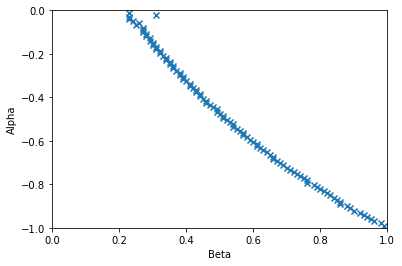

1.9570120964708762
1.9389759830589037
1.9189744845744283
1.8967102336984973
1.8769625523718583
1.8575753147405099
1.8364591430920296
1.8191110496486096
1.7970607669697412
1.7770420235940219
1.7581037752275797
1.7341068946194056
1.7145744655867745
1.6941271534394393
1.6803327708371325
1.6553240234648035
1.6386740020781343
1.6171510616355524
1.5974503277424825
1.5766283409140223
1.556919800480159
1.537219549614505
1.5189455237902991
1.4918566045044523
1.4780711526599992
1.4597069619461285
1.441443217630219
1.4168857416735376
1.3953592173327982
1.3792984140437263
1.3508486504282444
1.3372931624192017
1.316858116352434
1.2932851654450939
1.2776853813671538
1.2522917316474067
1.2375279278115154
1.2184549468525052
1.1991187188838526
1.1803077818866188
1.160050656097413
1.1371015430467528
1.1167223789468717
1.1004626887724946
1.0769299006729716
1.0580465850919811
1.0342918983715939
1.0159423995607475
0.9968512780114445
0.9768100971876589
0.9567053913711778
0.9379944711932193
0.917657058017087

1.2765429312031793
1.2580703460561793
1.2341455869097333
1.2167595889145535
1.196711904302394
1.1780255846902392
1.1560028330054237
1.1361803772357446
1.1156947697778967
1.096357828858869
1.0759859476120133
1.0561125049081679
1.0354757551347264
1.0157746630576914
0.9949653608857864
0.9728686598523847
0.9554316570213379
0.9335070329155247
0.9135724357129353
0.894572283381433
0.86864797340858
0.853782576495014
0.8337884003177877
0.81347258880436
0.7928326421900791
0.7727987171922134
0.7525029961613446
0.7319856644766956
0.7117628221888398
0.6913970937691626
0.6799667590488909
0.6508464586197714
0.6302712257119787
0.6102751176665064
0.5885871961709013
0.5695693756686323
0.5488603659174056
0.5288974136504732
0.508521913729428
0.4880510688152006
0.4678668255729948
0.4475963001617577
0.4265071372559159
0.40662091961646274
0.38636250218077683
0.3656221221227716
0.345556011945936
0.32479789822568234
0.3046374806405508
0.2844760450398096
0.2638602796772845
0.2433398165643586
0.2229366291026946


0.5851301662053202
0.5642003736028947
0.5436094401749743
0.5230917215572757
0.5023817445117251
0.48184779852903076
0.46124023306406936
0.4406161841954623
0.4202048131051978
0.39945555725651594
0.3753106314488833
0.35767934291335207
0.33732570001414486
0.31505927663569044
0.26991489149225895
0.27448987977363987
0.23053903318282826
0.23374797861362717
0.21502648567271282
0.20150112443755883
0.16340190307316566
0.14880249367265233
0.13000591891029672
0.10921792946517728
0.08846793724956556
0.06761012609722897
0.0468075185986653
0.01871264684947657
0.0045161879501084525
0.015494530640153418
0.036384293445224626
0.057763184276265915
0.07967856766047968
0.1054901660834004
0.12040627121747535
0.14152034538990055
0.16264923031652256
0.18470159607047412
0.20500261184125418
0.22675156461271218
1.7807774428103185
1.756253570339362
1.7393585298920853
1.7182270114701501
1.68962646537955
1.6776414085863083
1.6480828188941328
1.6338617459164633
1.6178091070367917
1.5976869103058646
1.56719993817665
1

0.10925783650487704
0.1316534409023391
0.15502264373868133
0.17375398113065713
0.19463479430411043
0.23424263398426426
0.23855770017155534
0.260479847312814
0.2822726066991672
0.30688768919023246
0.325414957652136
1.6998313557108031
1.6740400630226877
1.657290958356663
1.6302277090899717
1.6162390721333741
1.5892889460479842
1.569847108473586
1.5480249243673576
1.531103342282112
1.5126952920969066
1.4880288368964676
1.4611800128821828
1.4483952867571699
1.428045993084967
1.4136999350454098
1.3974342913457725
1.3701413099073818
1.3577933070035222
1.3365641389931333
1.317831041740538
1.297768311084099
1.2503905918806322
1.257546491463851
1.237367253017643
1.2037561372446821
1.18809086372139
1.1249592184615202
1.1316534120621646
1.1362709881106314
1.090306015171687
1.0941486903189244
1.0757265147932396
1.0527016158183227
1.0102916320260744
1.013857404187445
0.9934043588347754
0.973666062576103
0.9524879957133204
0.9327058478238163
0.9115134798758159
0.8909549691038346
0.8678381746203259
0

1.2385686155509756
1.2148205802181875
1.164453582433803
1.1779090597535227
1.125181764951601
1.0816810018777918
1.0787184418957378
1.073352017965941
1.0506844666137836
1.045494739057278
1.0353189701964882
1.0148703238215566
0.965635877115484
0.9738735100886402
0.9483692512642075
0.9224913506758556
0.9129338491261071
0.8765240654090141
0.871043715885764
0.8504192792568019
0.8297811466775509
0.8091236733001893
0.7889078602783544
0.7679767558094187
0.7470403165164512
0.6562444077123687
0.7055755615818002
0.6847995865268978
0.6640181220141809
0.6435068919647902
0.6224024686542968
0.6015670608772029
0.5528589835728454
0.560041819185882
0.5389704733523941
0.5505236873047218
0.48645289603134184
0.47610249966310964
0.4552564459646068
0.4342861961971352
0.41330200095711844
0.3923021487548609
0.3419799126407873
0.35025299498697954
0.3292056314542752
0.2862647881376076
0.2870680280915044
0.26781626156054805
0.2448740907953564
0.22400209456444442
0.2026325477073191
0.18149624817157425
0.1573980457

0.5609601710589946
0.5400276323463422
0.5190757879423777
0.49810720247606316
0.4771215772831864
0.456118526728975
0.43769746590652336
0.4140598246159113
0.3930067636700874
0.3719366125229857
0.3508495035492687
0.3297487550235098
0.30873412646973486
0.287505567687563
0.26636475490530176
0.2452639885643394
0.22405052201489362
0.1887791800949429
0.17531698191971587
0.16052475094691046
0.05323347866011008
0.11817704670129957
0.0970205500117123
0.07933658459505967
0.05484714827093615
0.03380287553035968
0.01297158138323468
0.0074466018516146
0.028833301292531935
0.06612708911817272
0.07119673168357718
0.09296287111803567
0.11487484265209372
0.13691234912934303
0.15901983638575284
0.18126232100215145
0.2036425067833454
0.22603772351969362
0.24847924357967013
0.27103440353637726
0.2936526816389607
0.3168700532117621
0.3394618783109716
0.3625382993597178
0.38523244582804855
0.4097746447879804
0.4702959178952705
0.45340337406416636
0.47637624759225167
0.4993800844287578
0.5223539415357666
0.547

0.24511080546864666
0.26795643756536236
0.2908848835878562
0.32429401381792056
0.3369650911753568
0.36096665989723936
0.3833546903371817
0.4087269142037831
0.43451177392733775
0.45327621494139786
0.4780206922729803
0.5001523280880824
0.5236757806652971
0.5473490133257582
0.5708651130325822
0.5956011565819073
0.6197986589105642
0.634084695206308
1.4381846479630065
1.4087927185467544
1.3833304091802137
1.3826545188971893
1.3512178651142113
1.3449545079917686
1.3229598706403134
1.2988012410953291
1.2796687581947017
1.2604903974363562
1.1887529249046418
1.1747383024702902
1.2012741573681918
1.1812744827959512
1.161206581264531
1.1410647137654972
1.1208671669017218
1.100623699249369
1.0803618648093543
1.0600066705907876
1.0396449213547296
1.019245411741087
0.9988248298169241
0.9783687307154038
0.9578917214696635
0.9373804327714802
0.9159842148320747
0.798820625398183
0.8757145690423012
0.8036680587936167
0.7384412245036587
0.8138388837423894
0.734618838723477
0.7630771237535193
0.7517700150

1.0620433400739147
1.0363191124511781
1.0147964119977135
1.0011925933886787
0.9831495978069857
0.9604491118423919
0.9400294082751373
0.9208634438069097
0.8991128571511754
0.836278339760578
0.8539122294433303
0.7946869944874103
0.8169818864166473
0.7963939668014021
0.7757885885985477
0.755585751784043
0.7345022860600938
0.7138356748430794
0.6931432260469655
0.6463420629107582
0.6517089797608969
0.6309650636974956
0.6102001946512685
0.5390975731089056
0.568620545166323
0.5440896105761838
0.5269736947645609
0.5061257348353218
0.4852602314593566
0.4643822009531019
0.4436342450594842
0.41293132187088116
0.4016580473118174
0.38072423637620423
0.3598925659018378
0.33882254358988995
0.31795776612376864
0.2984774115588661
0.2759054172107202
0.25492377795775417
0.23394040753282364
0.21295837481499275
0.19198356250472354
0.1710191069983467
0.15007311047306196
0.12915335563341465
0.1067350414362712
0.08744595201497964
0.06670139186816805
0.04608168590814642
0.025673873414919335
0.00573837169593699

0.34564481503290756
0.3248677063861342
0.30408655730227585
0.28330332385131174
0.2625212024263317
0.24181825996320064
0.2210443516538003
0.20027905003761337
0.17946369512917446
0.15954823410534583
0.1381138276768002
0.11746746776170579
0.09683351193190053
0.07634024677274506
0.05601700482928725
0.035806921665971145
0.015994680294105928
0.002634358676570434
0.02221750321853405
0.04483277374371803
0.0640170680704677
0.08558953861935246
0.10758427141990677
0.12978083439059912
0.1522643067899081
0.17501038648546877
0.19790780337012617
0.22116190562450824
0.24416848672068137
0.27042951906839957
0.29111087114612316
0.3147521424831966
0.3385059873148652
0.3623802214367989
0.3879432779499589
0.4104205125210783
0.4345371099499536
0.4574459737389937
0.48347704111757156
0.507658527763874
0.5319890221968135
0.5565748660000567
0.5811894002600013
0.6058638540561809
0.6374687897309205
0.6594361180693998
0.6802088460610971
0.7094923915220466
0.7431954103263207
0.7566950534148174
0.7801199997133674
0.8

0.2738310453826525
0.29754587470226035
0.32145614875069534
0.3455512324074513
0.3703986296404925
0.394023419133784
0.41843398101758944
0.4429501356673011
0.46756957300542484
0.49228343335260466
0.5187604786241647
0.5419768723024622
0.5669467656149346
0.59195551569514
0.617218848300495
0.6427309191355587
0.6687171416807579
0.6928834284427098
0.7182884774466385
0.7436993902986186
0.7692773963019313
0.7947809213460664
0.8204026041096494
0.8474640241922254
0.8717766636065435
0.900269189009103
0.9234051815033194
0.9491514992257026
1.1785828990334954
1.1437082758820698
1.1156410607859524
1.096616513631387
1.100730571258875
1.0872830045846675
1.0638315932375302
1.0479384677346826
0.9739949197752716
1.0051986249598877
0.9853289038546584
0.9653505475308503
0.9453180482817587
0.9252249893608434
0.8886761207355454
0.8849327195740144
0.8647415397064564
0.8445207874990102
0.8235195591259202
0.8040307465431211
0.7844104012342568
0.7122083118429131
0.7431764376612063
0.722864935504568
0.7025410415578

1.0045587434037857
0.9220650588078391
0.9451220251452416
0.9464651112580482
0.905395986401115
0.9068241689517574
0.8869942162374144
0.8669234291242602
0.8502462150870238
0.7571888169728936
0.8068210968237677
0.7330109336197449
0.7666728966154087
0.746584394230789
0.7201861784496871
0.7063939651813546
0.6862937614790887
0.6666099663935093
0.646089872437835
0.6259846567356716
0.6058817258502762
0.5857776989575041
0.565673642611421
0.5455721182234117
0.5347939725938786
0.508478417394228
0.48527087318869894
0.4651752794603121
0.44524315590031227
0.4296120942206764
0.40490000463899356
0.3848134770345436
0.36485610669347934
0.3446581840699911
0.3245890618522861
0.30452798131488074
0.28447741400425125
0.26444027282071464
0.24249889517396522
0.22449451367788972
0.20451332147249174
0.1844926450125369
0.16458449862776298
0.1447256952664699
0.12492989047956259
0.10521582816852097
0.0856095645196709
0.06615009762314354
0.04690140484227748
0.0280185609077338
0.009679102813991538
0.00712658906024672

0.3739607827078959
0.35419176242282785
0.33456954795369165
0.3149603111934287
0.29536749014563096
0.2747842714800704
0.25668423521891925
0.2366945754245875
0.21718400642202157
0.1977052189277071
0.17826384588006702
0.15886893305971048
0.13953163864430412
0.12026728681917288
0.10114660661642558
0.0820491989125798
0.06317012958519869
0.04452973502104528
0.026261221729278257
0.008693531218609546
0.007286761965306842
0.025424582829256973
0.04486296785186846
0.06511115766504062
0.08610389676067225
0.10759694035996072
0.12955376930682108
0.15191585147572534
0.1746385013811049
0.19763251430057036
0.2210227573545368
0.24457829933223396
0.26843126765498926
0.2925669526593207
0.316859500734214
0.3413482446670812
0.32675974813166114
0.3908119804187892
0.4158728924829025
0.44098020391930653
0.4663307931594042
0.4921776978037958
0.5172816465564646
0.54296710757554
0.5688192134207396
0.5947293264727235
0.6207440776681962
0.6468104195719472
0.6730179632273854
0.6993235189631576
0.7257504697386397
0.7

0.46230020890477314
0.5409465637968934
0.5138583281285847
0.5397962422798968
0.5659759573726875
0.5922267876160766
0.6210491907384493
0.6450806945002167
0.6716739547170538
0.6983682454700411
0.7253575412499076
0.7521778548006112
0.7789840484056652
0.8073390016009561
0.8332031216195835
0.8610182984781319
0.8884129402396298
0.9266786222062856
0.9425721240663826
0.9734418815900598
0.9988759476911893
1.025323940851571
1.0533071515884151
1.0808362415681503
1.1086675548433291
1.1412952118283
1.1644680934760818
1.19242816713385
1.2204502382369866
1.2485434314091604
0.9260298383130652
0.9084164854690934
0.8835822154957499
0.8555411499617841
0.847410665800204
0.7896183147734934
0.7900971260037808
0.7899420618611092
0.770451706345794
0.7509173450552853
0.7313677009653781
0.7118302592852176
0.6923073152191239
0.6728163651973575
0.6533529242137435
0.6339252009350368
0.5986878750927718
0.5951802738914983
0.5758644455614949
0.5565887809602229
0.5373477117498655
0.5092927940295522
0.49897301461933347

1.2817766484251494
1.3114975195071092
1.3393064670810857
0.8476897741044378
0.8255653115064819
0.8045768626470319
0.7519727482283765
0.7693217133772426
0.7504391223157689
0.7228463008794335
0.7120671102211583
0.6928107789400628
0.6735686380219492
0.6543595950295598
0.6352067689303693
0.6161163259794263
0.5970863223169265
0.5781309271898548
0.5592404387914098
0.5404176720169387
0.521995584524384
0.5029717793434976
0.4846056096143336
0.4347508630148429
0.44724998620059114
0.42878088404809417
0.4103605433722505
0.39198070916677197
0.375260364252638
0.35533898625045146
0.3370685950591245
0.3188281350210241
0.3007286469988125
0.2824329214212239
0.26427565103851636
0.24614428638743313
0.22803917506882473
0.2099649231390595
0.19192413676591413
0.1739205698276059
0.1559631914653222
0.13806302898340836
0.12023463333129432
0.1024951723395654
0.08487622591853115
0.06741653577046389
0.0501776924310907
0.03330994565993255
0.01693232607370153
0.0017772528499721777
0.012852217635960046
0.030183152133

0.18860743782776482
0.17139468805700755
0.1542198195308998
0.13709330947078296
0.1200265043459167
0.1030387053235853
0.08615777798221745
0.069470886222086
0.05292932789817081
0.036634569359103364
0.021222133094303108
0.005998635144497664
0.007286999079375101
0.023259684166749596
0.04085591939196885
0.05959483888860141
0.07924761638399108
0.09967030637135955
0.1207635497499102
0.1424485121911034
0.16466370440585174
0.18735905926499863
0.21043228156006835
0.2340243433259738
0.25792832690774387
0.2821735568507117
0.3067353331977242
0.3315927751989979
0.3567261124816844
0.3821201778196713
0.40769077649108737
0.43361951590107173
0.4596976803104275
0.48591453615391483
0.5124541305164475
0.5390467407655746
0.5658730173713589
0.5928673746046518
0.6200766757066364
0.6473717020836698
0.6747449737569243
0.7023754931879137
0.7300740562475189
0.757836441915648
0.7857759872630347
0.8138833017829296
0.8420392057129314
0.8702431835502635
0.8986045692693914
0.9284894440987012
0.9740107888819275
0.98457

0.392370821149184
0.4182870029721367
0.44445077763735247
0.4707800903854405
0.4973942355087662
0.5242841862044502
0.5513043627220039
0.5785087867325133
0.605891508612707
0.6334438038564632
0.6611530974727906
0.6889517479739692
0.717744763427957
0.7451758027729649
0.7734560607288867
0.8018007583555031
0.8303954274104413
0.8590384244061361
0.8877964967508183
0.9166009828327232
0.9456274486448485
0.9746915464996337
1.003853554463972
1.0331034171931033
1.0624428572441382
1.0918656639118614
1.1213202071130348
1.150904861484465
1.1805604170358195
1.2103384095510388
1.2423234094121447
1.2700103801037315
1.2999011011685968
1.3299422049913951
1.3607535966372284
1.3901221279707858
1.420372532435964
1.4505248605195937
1.4808161588156956
1.5111153949603533
1.5415343521737248
0.653419499544343
0.6454518807520803
0.6319488695398072
0.6124454097973009
0.5941976841142266
0.5479043324237645
0.5574747262435534
0.5392853954574539
0.5212797323755975
0.5034724784194667
0.4858628172394666
0.4613802060252931

1.630618968300981
0.5897037630923346
0.5698394383820892
0.5524576392816591
0.5349188685869347
0.5099301830305432
0.49932534531341255
0.4818243023282233
0.46461647521504845
0.44771172078147686
0.4311042216464924
0.41477352684248425
0.39900883491956735
0.3828390986229452
0.3671763054952507
0.3516783056113749
0.33631461344831526
0.321061978916556
0.305894086229775
0.2907921598821831
0.27573481001712874
0.2607072585833772
0.24569599068236894
0.2306908315052352
0.2156822082144175
0.20066631391502662
0.18563778405788084
0.17067511625386594
0.15554699897555216
0.14049136226460304
0.12543948916274647
0.11046800170897958
0.09546422193695651
0.0804644173543167
0.06562413232913246
0.05098791885321218
0.03648288484194318
0.022412579044271515
0.009040809147111245
0.0023912676000680715
0.015803783988158952
0.031300773248304714
0.04827672432988967
0.06639746906798691
0.08548910929062073
0.10548903520381406
0.12618541192274862
0.14756120417706192
0.16948939059527587
0.19204360219170935
0.2151144101261

0.11205701715407938
0.09804169965175791
0.08404020852713444
0.07002414621911672
0.056159507160626905
0.0424505214470963
0.029053301741324398
0.01600314276165731
0.003987034815099353
0.006725810138847001
0.020336799842736626
0.03576040110032409
0.0525493697171738
0.0704744918703278
0.08932287374470499
0.10916450330676826
0.12972959487649982
0.15093906698897852
0.17286268897671805
0.1954497978732942
0.2184486646367775
0.242096499309992
0.2661476912770284
0.29056627552863684
0.31553845211586934
0.3408248476433589
0.3699486955798627
0.3924553503537914
0.4186845178417496
0.44536395058125494
0.4722533776369173
0.4994087070899983
0.5267406466360622
0.5543891073228493
0.5822649264810603
0.610433792989722
0.6387352416534743
0.6672266759308025
0.6958328954056024
0.724766482746027
0.753721170642443
0.7829125966357412
0.8123298968260424
0.8417532042262149
0.8714560501073471
0.9012268036905072
0.9311271191240543
0.961151371298875
0.9912334633255601
1.0266384817605694
1.051862954129947
1.08233993962

0.9695988425124432
1.0003005042889377
1.0309834413639474
1.0618520991844977
1.0928384887940241
1.1240054809401478
1.1551392214007943
1.1867197201682456
1.2179126924547803
1.2493480795630827
1.2810004305756646
1.3126144648221643
1.3444388612175724
1.3762234258152584
1.4082083639465444
1.4406757990107892
1.4723465913296945
1.5044261258150458
1.536837488456766
1.5688908663596253
1.601276679383463
1.6339845647545708
1.6661145563843047
1.6986909789537203
1.7312417083439455
1.7639257848045993
1.7968853302056744
1.829380110055708
0.4163562648387286
0.39500440289298755
0.3575931583867098
0.3634913571559352
0.3485011076644439
0.33430353638500393
0.3208246996464821
0.3079424563806891
0.29552569422030894
0.2834526251239714
0.2716187839494447
0.2599342823190344
0.24832723406204468
0.23674153918924867
0.22513266709826468
0.21346730866209662
0.20172110596902584
0.18996716641944267
0.1779212252324494
0.16593439367048674
0.15366360814995783
0.14136002141065515
0.12894820010267355
0.11650700692787186
0

0.31826146565868646
0.3041137258825038
0.279357355231578
0.27868804541130543
0.2676018835037975
0.2572496272083884
0.24737891052335834
0.23778917678028522
0.22845851370195858
0.2129589371825543
0.20936677404803522
0.19973454212698244
0.19004161483961615
0.17997737946273207
0.16981325011711532
0.15944779499440478
0.14896035617540934
0.1381937013653635
0.127161364604019
0.11602953232552186
0.10480771451012011
0.09330022496915598
0.08174671665088006
0.07010558238904323
0.05841607166933404
0.0467307236855877
0.035184357239211296
0.02370273077317146
0.01267492302372534
0.002549686575228541
0.006543917686282688
0.018581635738583225
0.032397466283346846
0.04780072966198181
0.06438900545782851
0.08208353260171604
0.10077584304896764
0.12037467099558051
0.14073013880215068
0.1620001350056477
0.1839021627588209
0.2063832385929777
0.2296290153347161
0.25336575916865284
0.2776345868079528
0.30240230250763056
0.3275503890325014
0.3532209966792602
0.37930227277547185
0.4057724680158245
0.43268965287

0.18065436643818744
0.2030055926499856
0.22592676707923334
0.24962160611497958
0.27380370382578983
0.29851886685249807
0.3236456537372765
0.3494203141583736
0.37555127733826604
0.40209932626693123
0.4290416371078757
0.45635543719280797
0.48402324743355246
0.5120237621813707
0.5403415569108836
0.5689560389815201
0.5981077396991884
0.6269394737962334
0.656455877589312
0.6861272666911382
0.7159462846256666
0.7461650263431489
0.7765031622652717
0.8069609880037448
0.8377826552068414
0.8686212560934348
0.8998061113485248
0.9309921509550197
0.9625078840776844
0.9941046951678721
1.0258338071851807
1.057713098259426
1.0897330162201544
1.1218845409011344
1.154162757090426
1.1864848740482377
1.219084193040799
1.2516456473426973
1.2843902951487134
1.3173090453691585
1.35019196134042
1.383238205659795
1.416453652644008
1.4496219656894562
1.4830121345515253
1.5164218572963069
1.5498548872984745
1.5834890359188525
1.6171407070510635
1.6508021388371752
1.684612417547657
1.718530519132294
1.75241667547

1.490026503356503
1.52395931270011
1.5579941892248335
1.59215934801479
1.6274307887737058
1.6616994038809203
1.695143631452623
1.7295489563301703
1.7641470626546656
1.7987023474689758
1.8333757136120699
1.8681152114296256
1.9029808947688105
1.937803623978508
1.9727744026201945
2.0077191613658463
2.0435189386127757
2.077916210534649
2.1130653799641297
0.16084989370783076
0.15640070881602616
0.15388021424191856
0.15251783182222797
0.15111068981699083
0.1491855687413593
0.14657850722600677
0.1432523812829163
0.13922086773867703
0.1345192363384379
0.1291908699928876
0.12327938510868061
0.11682870007812
0.10988100404617686
0.10255430459489955
0.09465823548933766
0.08646131649648406
0.07800573885433808
0.06909564381949908
0.060092476678355274
0.05072549915913612
0.041295247126524465
0.03179567792516057
0.02232791418775071
0.013058191723839555
0.004479093198643876
0.0030220470937960585
0.01265049066363497
2.9672140913169618e-05
0.037656223972121323
0.0523479131275618
0.06828895627586948
0.085

0.10872587927925007
0.10512265904701894
0.10074161685924178
0.09566649620598192
0.09004639921291205
0.08371306667709712
0.07704214526237338
0.06984342132430635
0.062163956578768415
0.05432925409252699
0.04612492648913866
0.03760512720729028
0.02904913507605899
0.020584716839743944
0.011995262738504493
0.003222911137611718
0.003362624280628396
0.011585813636963193
0.0225121000026856
0.035056545942985226
0.049018741715008946
0.06427113940883054
0.08070711211160218
0.09814747470184003
0.11679589212105278
0.1362092358744278
0.15670089903965315
0.17783680197310506
0.19984744274427751
0.2226871853969397
0.24602030818530132
0.27009749220852475
0.29487960096370625
0.32013778440427654
0.3459338107752576
0.3721403581061175
0.39902652624742824
0.4261673024489362
0.4538385373408471
0.4819124547123018
0.5104784225390597
0.5665782992998316
0.5684761208202584
0.5979800492339225
0.6276998193082631
0.6579139011799727
0.6882087753376169
0.7189819860627198
0.7498080934408399
0.7809799637857375
0.81248346

0.38831531864235064
0.41552415107235385
0.44319280936092514
0.471193920025618
0.49982723952622643
0.528642253182854
0.5580421106510715
0.5876912699663229
0.6175768764153343
0.6478845483010468
0.6786052868031257
0.7095130908370757
0.7407004160009342
0.7720461547070818
0.8038557630825692
0.835801603893383
0.8678721262426347
0.9003782654699509
0.932986972389802
0.9657985962686338
0.9988051104868658
1.0319989242353569
1.0653694433363043
1.098809649390559
1.1325170070682011
1.1664806910141696
1.200402843566158
1.2346559346486792
1.268963320071079
1.3033065507220685
1.337875674748424
1.3726627902409163
1.4073901573498082
1.4424105084149184
1.4773694587829727
1.5126136515971556
1.5478687855851687
1.5832310875705917
1.6186895245570125
1.654171957435486
1.6898881767725449
1.7255464882686478
1.7616330051257398
1.7975266838168293
1.833951618778477
1.8696610228948105
1.9055370300445709
1.9416820948010949
1.977974631020141
2.0143839189167743
2.050901974608662
2.08728894274747
2.12382925272485
2.160

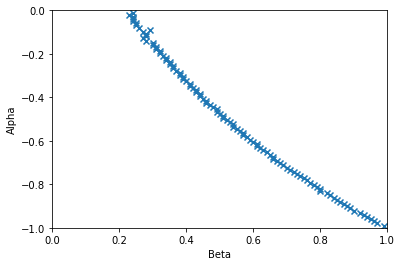

Runtime: --- 1089.5797710418701 seconds ---


In [24]:
import time
start = time.time()
for i in range(3):
    PhaseDiagramData(100)
    print("")
    filename = "gapdata_100_corr.csv"
    PlotPhaseDiagram(filename,100, mode = "scatter")
print("Runtime: --- {} seconds ---".format(time.time() - start))


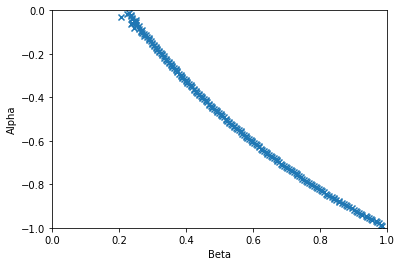

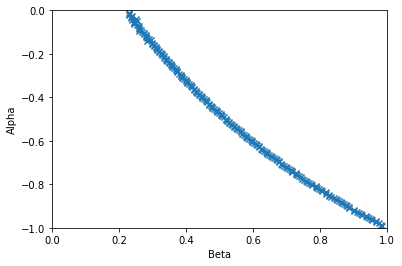

Runtime: --- 2997.7713117599487 seconds ---


In [27]:
import time
start = time.time()
for i in range(2):
    PhaseDiagramData(200)
    print("")
    filename = "gapdata_200_corr.csv"
    PlotPhaseDiagram(filename,200, mode = "scatter")
print("Runtime: --- {} seconds ---".format(time.time() - start))

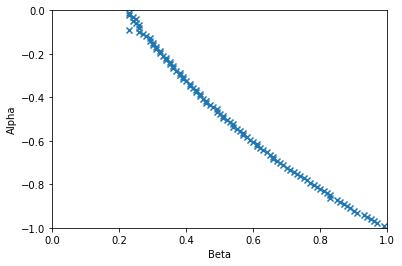

In [21]:
filename = "gapdata_100_corr.csv"
PlotPhaseDiagram(filename,100, mode = "scatter")

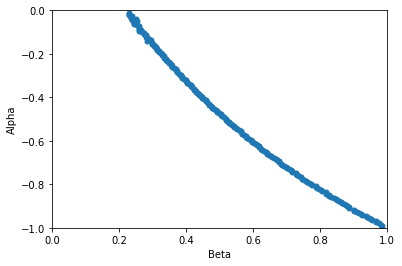

In [36]:
filename = "gapdata_200_corr.csv"
PlotPhaseDiagram(filename,200, mode = "plot")